In [90]:
#import required libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
%matplotlib inline

In [91]:
df = pd.read_csv('tmdb_data', lineterminator='\n')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [92]:
df['DataFrame Column'] = pd.to_datetime(df['release_date'])

In [93]:
df['twitter_tag'] = "#" + df['title']

In [94]:
df['twitter_tag'] = df['twitter_tag'].map(lambda x: x.replace(" ",""))

In [95]:
df['DataFrame Column'] = df['DataFrame Column'] + timedelta(days = 1)

In [97]:
df['tweet_tuple'] = df['twitter_tag'] + "^^" + df['release_date'].astype("str") + "^^" + df['DataFrame Column'].astype("str")

In [99]:
list_of_twitters = list(df['tweet_tuple'])

In [102]:
list_of_twitters

['#Avengers:Endgame^^2019-04-24^^2019-04-25',
 '#Avatar^^2009-12-10^^2009-12-11',
 '#StarWars:TheForceAwakens^^2015-12-15^^2015-12-16',
 '#Avengers:InfinityWar^^2018-04-25^^2018-04-26',
 '#JurassicWorld^^2015-06-06^^2015-06-07',
 '#TheLionKing^^2019-07-12^^2019-07-13',
 '#TheAvengers^^2012-04-25^^2012-04-26',
 '#Furious7^^2015-04-01^^2015-04-02',
 '#FrozenII^^2019-11-20^^2019-11-21',
 '#Avengers:AgeofUltron^^2015-04-22^^2015-04-23',
 '#BlackPanther^^2018-02-13^^2018-02-14',
 '#HarryPotterandtheDeathlyHallows:Part2^^2011-07-07^^2011-07-08',
 '#StarWars:TheLastJedi^^2017-12-13^^2017-12-14',
 '#JurassicWorld:FallenKingdom^^2018-06-06^^2018-06-07',
 '#Frozen^^2013-11-27^^2013-11-28',
 '#BeautyandtheBeast^^2017-03-16^^2017-03-17',
 '#Incredibles2^^2018-06-14^^2018-06-15',
 '#TheFateoftheFurious^^2017-04-12^^2017-04-13',
 '#IronMan3^^2013-04-18^^2013-04-19',
 '#Minions^^2015-06-17^^2015-06-18',
 '#CaptainAmerica:CivilWar^^2016-04-27^^2016-04-28',
 '#Aquaman^^2018-12-07^^2018-12-08',
 '#Spide

In [100]:
df = pd.DataFrame(list_of_twitters)

In [101]:
df.to_csv('twitter_tags.csv')

In [38]:
to_drop = df[df['genre_ids']=="[]"].index
df.drop(to_drop,inplace = True)

In [49]:
genre_col = list(df['genre_ids'])

In [52]:
unique_genres = []

for genre_grp in genre_col:
    grp_len = len(genre_grp)
    genres = genre_grp[1:grp_len-1].split(', ')
    for genre in genres:
        unique_genres.append(genre)

unique_genres = sorted(list(set(unique_genres)))
unique_genres

['10402',
 '10749',
 '10751',
 '10752',
 '10770',
 '12',
 '14',
 '16',
 '18',
 '27',
 '28',
 '35',
 '36',
 '37',
 '53',
 '80',
 '878',
 '9648',
 '99']

In [56]:
for gid in unique_genres:
    new_col = 'genre: '+ gid
    df[new_col] = df['genre_ids'].apply(lambda x: 1 if gid in x else 0)

In [67]:
df.columns

Index(['popularity', 'vote_count', 'video', 'id', 'adult', 'original_language',
       'original_title', 'genre_ids', 'title', 'vote_average', 'overview',
       'release_date', 'budget', 'imdb_id', 'revenue', 'runtime', 'year',
       'genre: 10402', 'genre: 10749', 'genre: 10751', 'genre: 10752',
       'genre: 10770', 'genre: 12', 'genre: 14', 'genre: 16', 'genre: 18',
       'genre: 27', 'genre: 28', 'genre: 35', 'genre: 36', 'genre: 37',
       'genre: 53', 'genre: 80', 'genre: 878', 'genre: 9648', 'genre: 99'],
      dtype='object')

In [59]:
year_groupby = df.groupby(['year']).sum()

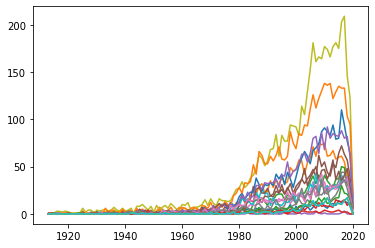

In [64]:
plt.figure()

x = year_groupby.index
y1 = year_groupby['genre: 10402']
y2 = year_groupby['genre: 10749']
y3 = year_groupby['genre: 10751']
y4 = year_groupby['genre: 10752']
y5 = year_groupby['genre: 10770']
y6 = year_groupby['genre: 12']
y7 = year_groupby['genre: 14']
y8 = year_groupby['genre: 16']
y9 = year_groupby['genre: 18']
y10 = year_groupby['genre: 27']
y11 = year_groupby['genre: 28']
y12 = year_groupby['genre: 35']
y13 = year_groupby['genre: 36']
y14 = year_groupby['genre: 37']
y15 = year_groupby['genre: 53']
y16 = year_groupby['genre: 80']
y17 = year_groupby['genre: 878']
y18 = year_groupby['genre: 9648']
y19 = year_groupby['genre: 99']

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.plot(x,y5)
plt.plot(x,y6)
plt.plot(x,y7)
plt.plot(x,y8)
plt.plot(x,y9)
plt.plot(x,y10)
plt.plot(x,y11)
plt.plot(x,y12)
plt.plot(x,y13)
plt.plot(x,y14)
plt.plot(x,y15)
plt.plot(x,y16)
plt.plot(x,y17)
plt.plot(x,y18)
plt.plot(x,y19)
plt.plot(x,y20)